In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df=pd.read_csv(r"C:\Users\USER\Desktop\gld_price_data.csv")
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


information about the columns in the dataset

Date: This column represents the date in the format mm/dd/yyyy.

SPX: It is an index that measures the performance of the 500 largest companies listed on US stock exchanges. The index is weighted based on the freely tradable shares of these companies.

GLD: This column indicates the price of gold. It represents the value of gold in the market.

USO: It represents the United States Oil Fund. This column provides information about the performance or price of the oil fund in the United States.

SLV: This column represents the price of silver. It indicates the market value of silver.

EUR/USD: It is a currency pair quotation that compares the value of the Euro against the US dollar. This column shows the exchange rate between these two currencies.

# EDA

In the exploratory data analysis (EDA) process, we will carry out the following steps:

1. dentify Unwanted Columns: Identify and remove any columns that are not relevant or unnecessary for our analysis.

2. Identify Missing Values: Identify any missing values in the dataset and determine the appropriate approach for handling them, such as imputation or removal.

3. Identify Features with a Single Value: Identify features that have only one unique value throughout the dataset, as they do not provide any useful information for analysis.

4. Explore Categorical Features: Analyze the categorical features in the dataset to understand their unique values, distribution, and frequency.

5. Analyze Categorical Feature Distribution: Examine the distribution of categorical features and identify any patterns or imbalances in the data.

6. Investigate the Relationship between Categorical Features and the Label: Explore how the categorical features relate to the target variable or label, and determine if there are any significant associations or correlations.

7. Explore Numerical Features: Analyze the numerical features in the dataset to understand their statistical properties, such as mean, standard deviation, and range.

8. Identify Discrete Numerical Features: Identify numerical features that represent discrete values or categories, and examine their relationship with the label to identify any patterns or correlations.

9. Identify Continuous Numerical Features: Identify numerical features that represent continuous values, and analyze their distribution and relationship with the label.

10. nalyze the Distribution of Continuous Numerical Features: Examine the distribution of continuous numerical features using statistical measures such as histograms, box plots, or kernel density plots.

11. Investigate Outliers in Numerical Features: Identify any outliers in the numerical features and assess their impact on the analysis and modeling process.

12. Explore Correlation between Numerical Features: Analyze the correlation between different numerical features to identify any relationships or dependencies among them. This can be done using correlation matrices or scatter plots.

By performing these steps, we can gain valuable insights into the dataset, identify patterns, and understand the relationships between variables, which can guide further analysis and modeling efforts.


In [3]:
#checking the amount of null values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [4]:
#checking for duplicates 
df.duplicated().sum()

0

In [5]:
#identifying features with 1 variable 
for column in df.columns:
    print(column, df[column].nunique())
    

Date 2290
SPX 2277
GLD 1930
USO 1514
SLV 1331
EUR/USD 2066


In [6]:
#Eexploring numerical features 
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes!='o') & (feature not in ["GLD"]))]
numerical_features

['Date', 'SPX', 'USO', 'SLV', 'EUR/USD']

In [7]:
#Finding discrete numerical features
dis_features = [feature for feature in numerical_features if len(df[feature].unique())<25] 
dis_features 

[]

In [8]:
#Finding continuous numerical features
cont_features = [feature for feature in numerical_features if feature not in dis_features+ ['GOD'] ]
cont_features

['Date', 'SPX', 'USO', 'SLV', 'EUR/USD']

# Distribution of continuous numerical features 

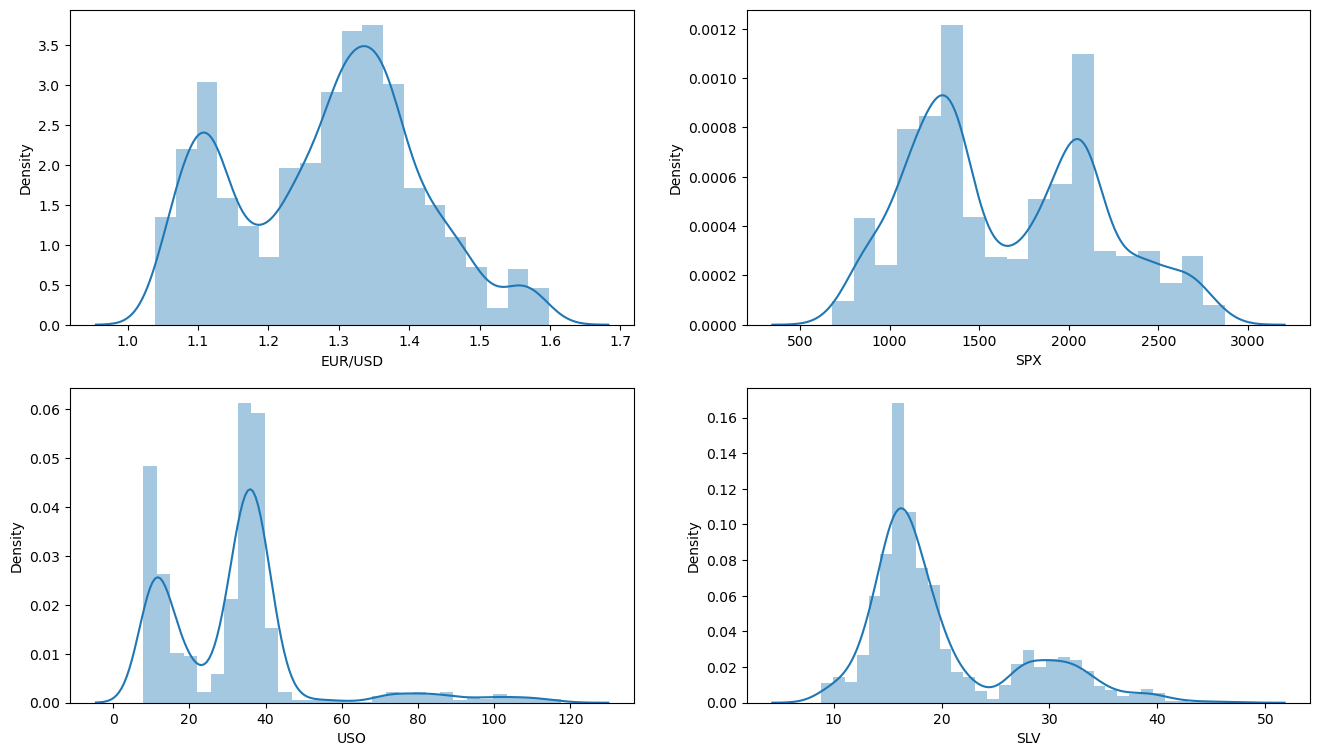

In [9]:
#plot of distribution of continuous numerical features 
plt.figure(figsize=(16,9))

df['Date'] = pd.to_datetime(df['EUR/USD'])
plt.subplot(2,2,1)
sns.distplot(df['EUR/USD'])
plt.xlabel('EUR/USD')

plt.subplot(2,2,2)
sns.distplot(df['SPX'])
plt.xlabel('SPX')

plt.subplot(2,2,3)
sns.distplot(df['USO'])
plt.xlabel('USO')

plt.subplot(2,2,4)
sns.distplot(df['SLV'])
plt.xlabel('SLV')
plt.show()

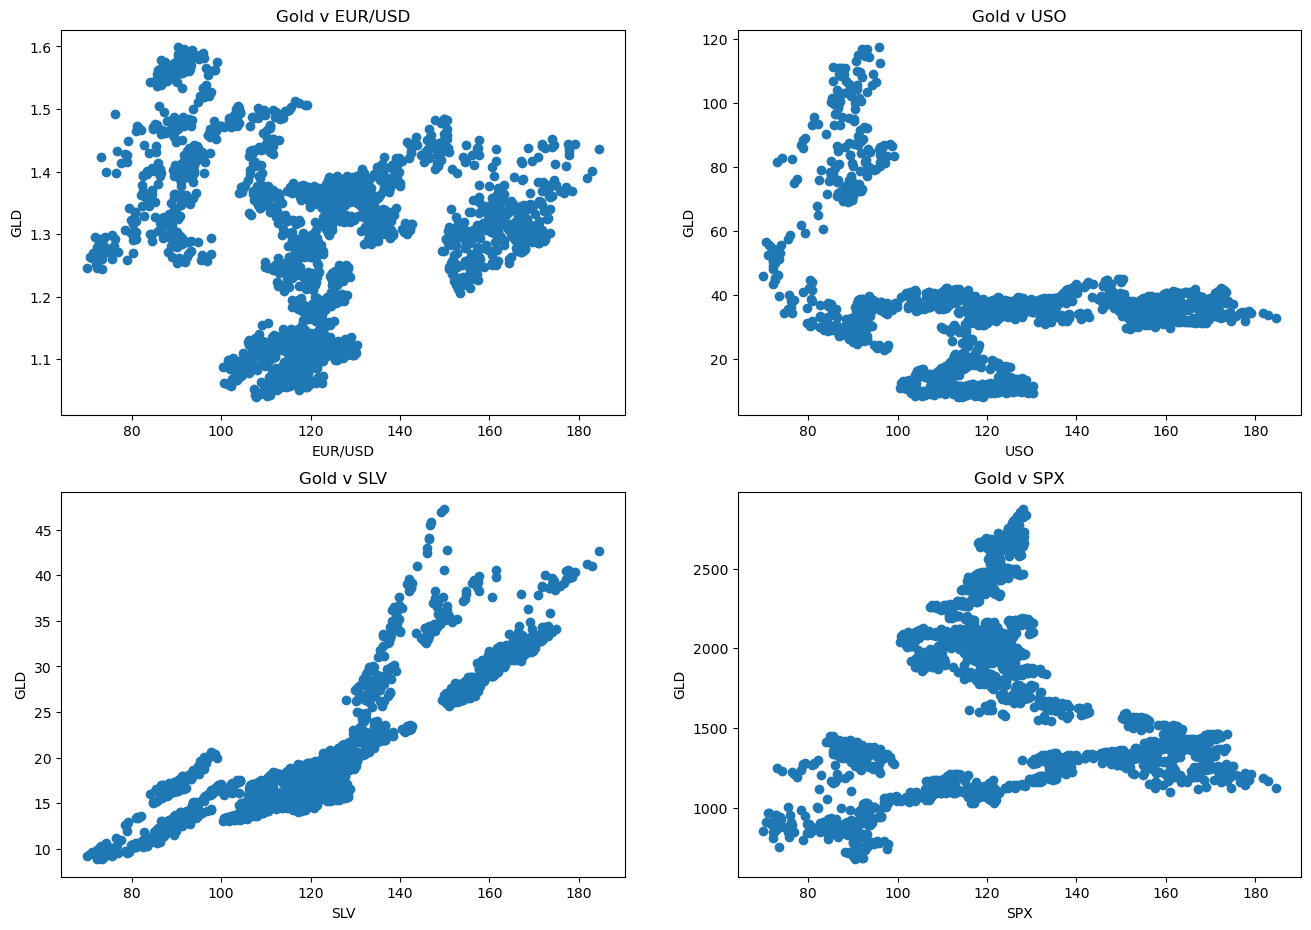

In [10]:
#Relation between Continuous numerical Features and Labels
plt.figure(figsize=(16,11))
plt.subplot(2,2,1)
plt.scatter(df['GLD'], df['EUR/USD'])
plt.title('Gold v EUR/USD')
plt.xlabel('EUR/USD')
plt.ylabel('GLD')

plt.subplot(2,2,2)
plt.scatter(df['GLD'], df['USO'])
plt.title('Gold v USO')
plt.xlabel('USO')
plt.ylabel('GLD')

plt.subplot(2,2,3)
plt.scatter(df['GLD'], df['SLV'])
plt.title('Gold v SLV')
plt.xlabel('SLV')
plt.ylabel('GLD')

plt.subplot(2,2,4)
plt.scatter(df['GLD'], df['SPX'])
plt.title('Gold v SPX')
plt.xlabel('SPX')
plt.ylabel('GLD')
plt.show() 

There appears to be a linear progression between the SLV feature (Silver Price) and the GLD feature (Gold Price). We are now going to identify outliers

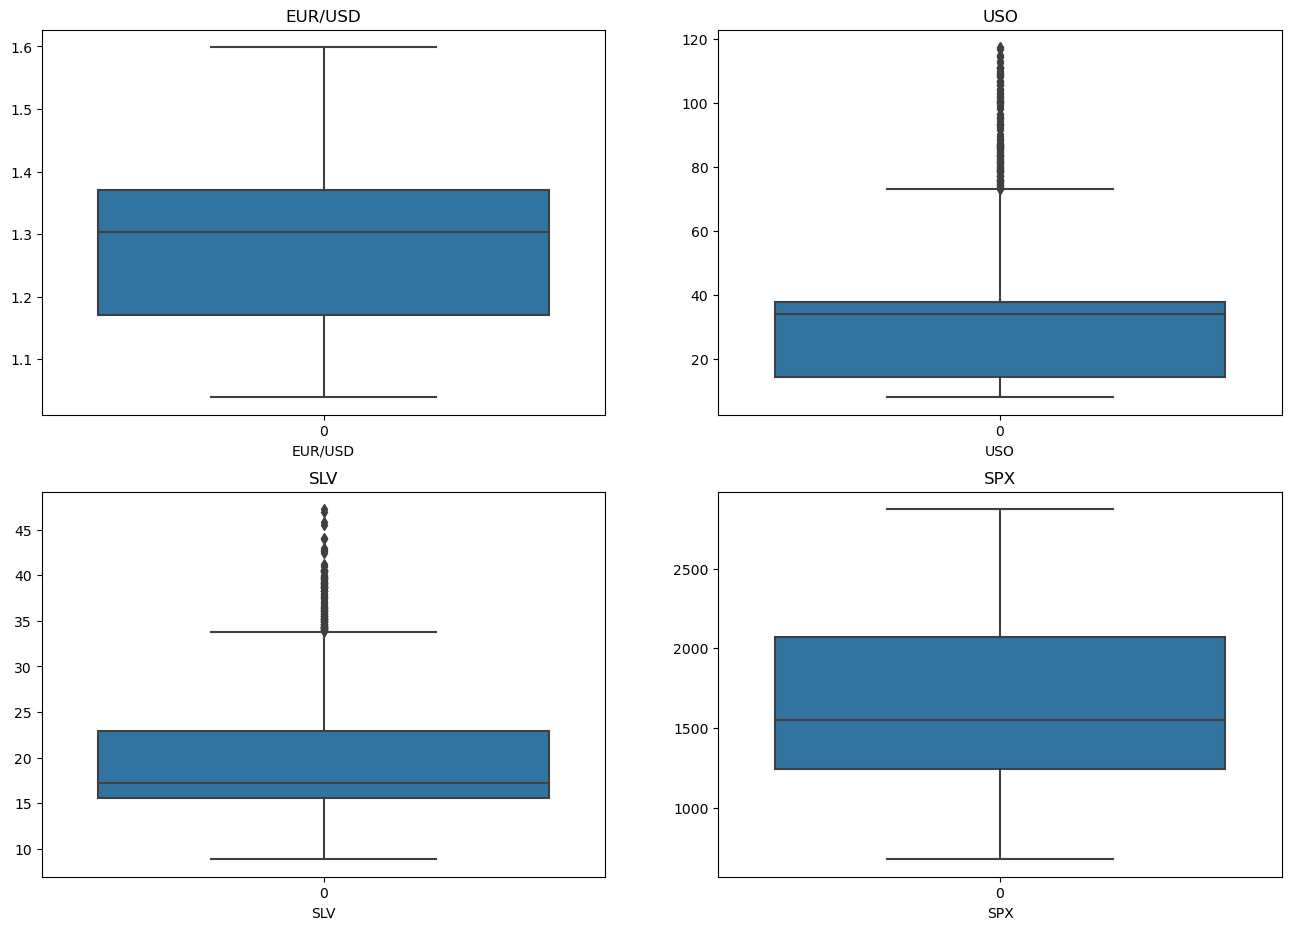

In [11]:
#Identifying outliers
plt.figure(figsize=(16,11))
plt.subplot(2,2,1)
sns.boxplot(df['EUR/USD'])
plt.title('EUR/USD')
plt.xlabel('EUR/USD')

plt.subplot(2,2,2)
sns.boxplot(df['USO'])
plt.title('USO')
plt.xlabel('USO')

plt.subplot(2,2,3)
sns.boxplot(df['SLV'])
plt.title('SLV')
plt.xlabel('SLV')

plt.subplot(2,2,4)
sns.boxplot(df['SPX'])
plt.title('SPX')
plt.xlabel('SPX')

plt.show() 

There seem to be outliers present in the USO (United States Oil Fund) and SLV (Silver Price) features.

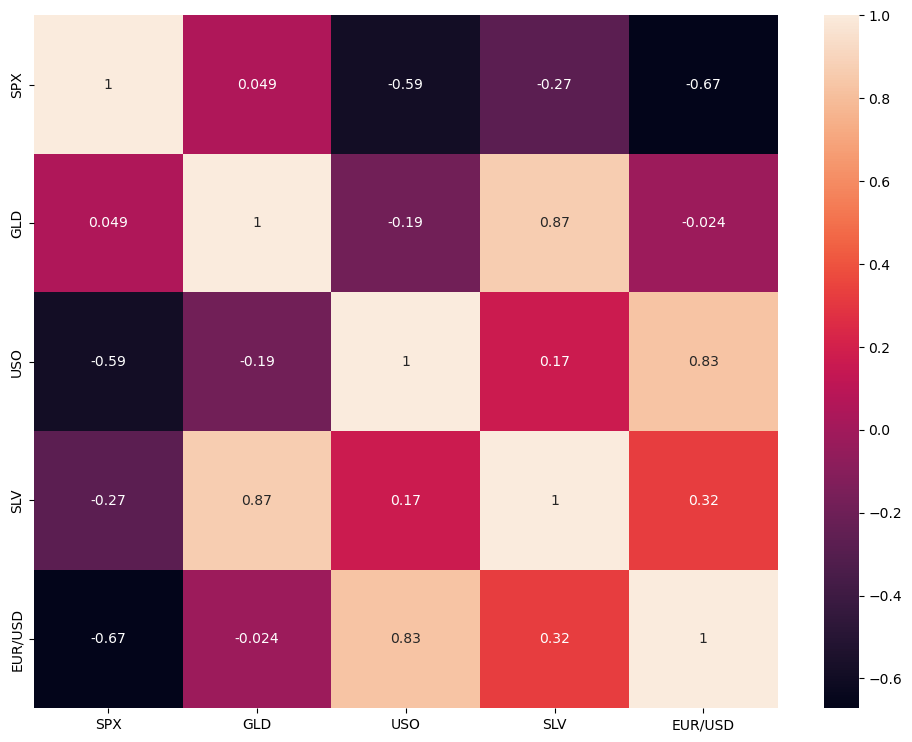

In [12]:
cor=df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(cor, annot=True)
plt.show()

In [13]:
cor['GLD'].sort_values(ascending=False)

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64

The SLV feature (Silver Price) exhibits a strong correlation with the GLD feature (Gold Price).

# Feature Engineering:

Drop Unwanted Features: Remove any features that are not relevant or unnecessary for the analysis or modeling process.

Handle Missing Values: Address missing values in the dataset by applying appropriate techniques such as imputation (replacing missing values with estimated values) or removal (dropping rows or columns with missing values).

Handle Categorical Features: Convert categorical features into numerical representations suitable for machine learning algorithms. This can be done through one-hot encoding, label encoding, or other methods depending on the nature of the categorical data.

Handle Feature Scaling: Normalize or standardize numerical features to ensure they are on a similar scale. Common scaling techniques include min-max scaling (normalizing to a specific range) or standardization (transforming to have zero mean and unit variance).

Remove Outliers: Identify and remove outliers from the dataset, as they can significantly impact the analysis or modeling results. Outliers can be detected using statistical measures such as the z-score, IQR (interquartile range), or domain knowledge.

By performing these feature engineering steps, you can improve the quality of the data, handle missing values, ensure compatibility with machine learning algorithms, and enhance the overall robustness and effectiveness of the analysis or modeling process.

In [14]:
#Dropping date column as it is not needed
df2=df.copy()
df2.drop(['Date'], axis=1, inplace=True)
df2.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [15]:
#Split Dataset into Training set and Test set
X=df2.drop(['GLD'], axis=1)
y=df2['GLD']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   test_size=  0.20, random_state=1)
print(len(X_train))
print(len(X_test))

1832
458


# Model Selection

To ensure the best performance of our model, we will employ model selection techniques to find the optimal algorithm and parameter configuration. In this exercise, we will consider three algorithms: DecisionTreeRegressor, XGBRegressor, and RandomForestRegressor.

By utilizing model selection techniques such as GridSearchCV, we can systematically explore various combinations of algorithm-specific parameters to identify the optimal set of parameters that yields the highest score.

The model selection process will involve evaluating each algorithm using cross-validation and scoring metrics to determine their performance. GridSearchCV will assist in automating the search for the best score for each algorithm by exhaustively searching through the parameter grid.

Based on the results obtained from the model selection process, we will select the algorithm with the highest score as the most suitable choice. This algorithm, along with its optimized parameter configuration identified through GridSearchCV, will be utilized to construct the final model.

In [17]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [18]:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },

        'random_forest_regressor': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10, 50, 100, 130],
                'criterion': ['absolute_error'],
                'max_depth': range(2, 4, 1),
                'max_features': ['auto', 'log2']
            }
        },

        'xgb_regressor': {
            'model': XGBRegressor(),
            'params': {
                'learning_rate': [0.5, 0.1, 0.01, 0.001],
                'max_depth': [2, 3],
                'n_estimators': [10, 50, 100, 200]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


In [19]:
pd.set_option('display.max_colwidth', 100)
find_best_model_using_gridsearchcv(X, y)

,model,best_score,best_params
0,decision_tree,0.981243,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
1,random_forest_regressor,0.904003,"{'criterion': 'absolute_error', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 50}"
2,xgb_regressor,0.987293,"{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200}"


After applying model selection techniques to the given algorithms, including DecisionTreeRegressor, RandomForestRegressor, and XGBRegressor, we determined that XGBRegressor yielded the best results. Consequently, we will proceed to build the model using the XGBRegressor algorithm.

# Model Building

In [23]:
#Initializing the model
xgb_model = XGBRegressor(learning_rate = 0.5, max_depth = 3, n_estimators = 200)

In [24]:
#Training the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Now the model has been trained. Let's find the score

In [25]:
xgb_model.score(X_test, y_test)

0.9843028405062942

It has a score of 0.98 which is excellent. Now we are going to predict the test set

In [27]:
y_pred=xgb_model.predict(X_test)
y_pred

array([113.84165 , 143.79039 , 142.956   , 112.81348 , 114.96912 ,
        96.7008  , 111.29751 ,  92.82298 , 121.010796, 127.611824,
       147.78839 , 119.55766 , 120.10945 ,  87.25481 ,  97.017715,
        92.350655, 115.64621 ,  89.398964, 124.59682 , 115.60432 ,
       120.10395 , 151.13129 , 121.96685 , 121.33806 , 172.33714 ,
       108.48231 , 119.2616  ,  87.94481 ,  86.12053 ,  88.62438 ,
       120.959496, 155.96825 , 146.64824 , 126.204765, 125.41929 ,
        91.09687 , 162.88643 , 118.4747  , 106.32896 , 146.18968 ,
        93.214775, 123.98447 , 116.937035, 149.16457 , 119.5077  ,
        90.44545 ,  76.58083 , 122.2264  , 131.51006 , 118.98077 ,
       129.17218 , 167.0889  , 151.15157 ,  92.30207 , 150.1547  ,
       148.49596 , 113.09787 , 112.022064,  88.4083  , 126.91231 ,
       124.59682 , 150.46191 , 115.0361  , 110.898186, 157.88858 ,
       118.452896, 107.69299 , 131.87987 , 131.90227 , 127.467285,
       116.62936 , 150.2578  , 156.95755 , 168.44878 , 108.961

In this project, we employed model selection techniques to predict the price of gold. We explored various algorithms, including DecisionTreeRegressor, RandomForestRegressor, and XGBRegressor, to identify the most accurate model.

After conducting an extensive evaluation using GridSearchCV and ShuffleSplit, we found that the XGBRegressor algorithm outperformed the other models in terms of predictive performance. It consistently provided the highest scores and was able to capture the complex relationships within the dataset more effectively.

Based on these results, we can conclude that XGBRegressor is the preferred choice for predicting the price of gold in this project. The optimized parameters obtained through the model selection process can be used to build the final model for accurate price predictions.

By leveraging model selection techniques, we can enhance the accuracy and reliability of our predictions, enabling us to make more informed decisions in the context of gold price forecasting. This project highlights the importance of systematically evaluating different algorithms and selecting the most suitable one for a given task, leading to improved predictive capabilities and valuable insights in the field of finance.